In [1]:
%matplotlib inline
#Imports
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Additional imports
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
Base.classes.keys() 

['station', 'measurement']

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station 
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first() 

('2017-08-23',)

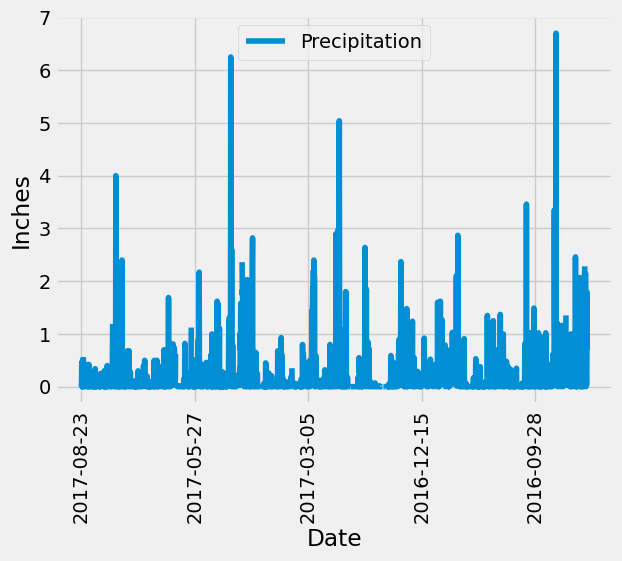

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

session.query(Measurement.date,Measurement.prcp).\
 filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.date.desc()).all()


# # Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp =session.query(Measurement.date,Measurement.prcp).\
 filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.date.desc()).all()

# # Sort the dataframe by date
df = pd.DataFrame(date_prcp, columns=['Date', 'Precipitation'])

#Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation')

#Set labels
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation='vertical')

#show plot
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# Get station count
stat = [Measurement.station, 
       func.count(Measurement.station), ]

#Save station count in descending order
station_count = session.query(*stat).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).all()

#Show List
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

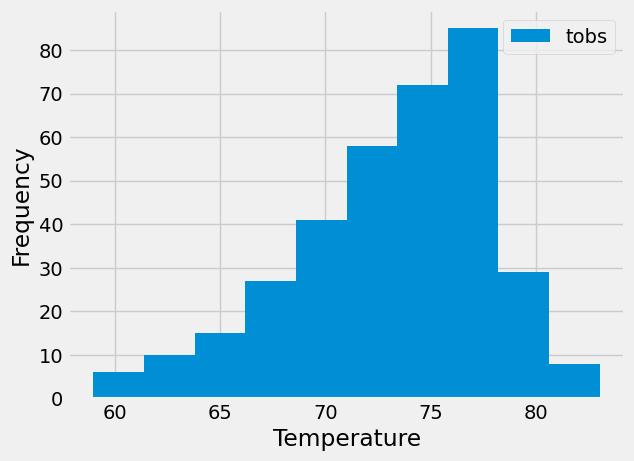

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs = session.query(Measurement.tobs).\
 filter(Measurement.date > '2016-08-23', Measurement.station =='USC00519281' ).\
order_by(Measurement.date.desc()).all()

#Set up datafrome for plotting
df = pd.DataFrame(tobs, columns=['tobs'])

#Plot dataframe
df.plot(kind = 'hist')
plt.xlabel('Temperature')
#Show plot
plt.show()

# Close Session

In [16]:
# Close Session
session.close()